In [1]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo ='/home/zyq0416/workspace/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
import matplotlib.pyplot as plt
import json

from pyBraytonHeatPump import BraytonHeatPump

%load_ext autoreload
%autoreload 2

{'initialvalue': {'isentropic_eff_mc': 0.88, 'mechanical_eff': 0.98, 'min_temperature_exchange': 20, 'industrial_waste_heat_t': 300, 't_reaction': 525, 'p_bray_H': 20000000.0, 'p_bray_M': 13000000.0, 'p_bray_L': 7500000.0}, 'primary_compressor': {'t_compressor_in': 525, 'p_compressor_in': 7500000.0, 'h_compressor_in': 1015148.1554031209, 's_compressor_in': 2905.1037832123293, 't_compressor_out': 611.0309565856585, 'p_compressor_out': 13000000.0, 'h_compressor_out': 1115346.2907591742, 's_compressor_out': 2918.7780366279017, 'power_compressor': 102242.99526127872, 'e_lost_compressor': 2044.859905225576}, 'primary_h_exchanger': {'t_h_exchanger_out': 545, 'p_h_exchanger_out': 13000000.0, 'h_h_exchanger_out': 1034336.3501360257, 's_h_exchanger_out': 2823.5627686024495, 'hot_out_h_exchanger': 81009.92988873937}, 'secondary_compressor': {'t_compressor_in': 545, 'p_compressor_in': 13000000.0, 'h_compressor_in': 1034336.3501360257, 's_compressor_in': 2823.5627686024495, 't_compressor_out': 614

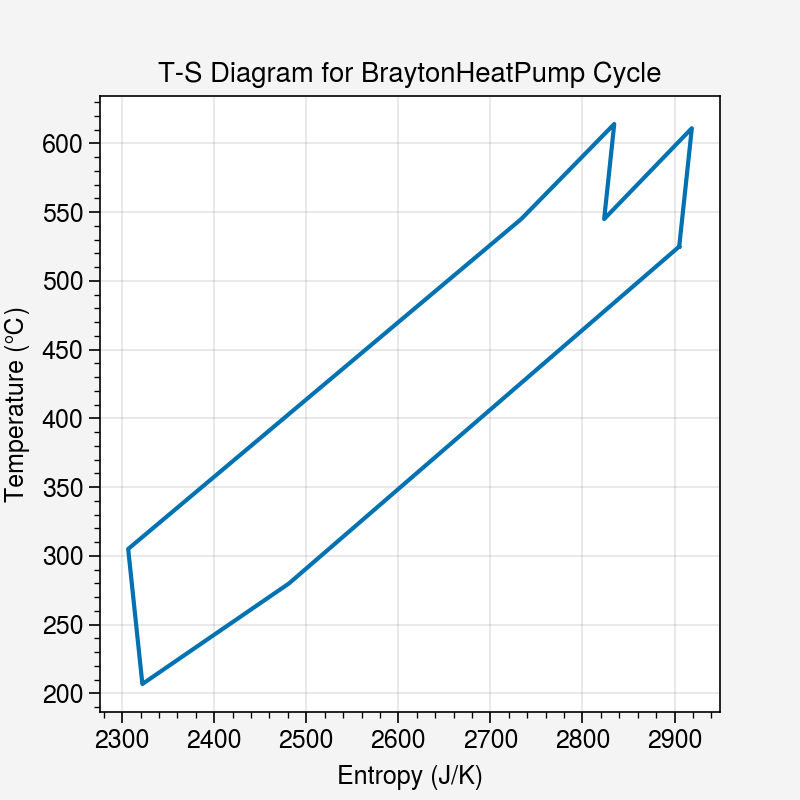

In [3]:
parameters = {}
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["isentropic_eff_mc"] = 0.88  #等熵效率
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
parameters["min_temperature_exchange"] = 20
parameters["industrial_waste_heat_t"] =300 #℃
parameters["heat_transfer_loss_eff"] = 0.96
parameters["t_reaction"] = 525

parameters["p_bray_L"] = 7.5e6
parameters["T_amb"] = 20
parameters["p_amb"] = 101325
bh=BraytonHeatPump(parameters)
input={}
input["p_bray_H"] = 20e6
input["p_bray_M"] = 13e6
input["Store_electrical_power"]=1e6 #1MW
results = bh.solve(input)
print(results)
T1=results["primary_compressor"]["t_compressor_in"]
S1=results["primary_compressor"]["s_compressor_in"]
T2=results["primary_compressor"]["t_compressor_out"]
S2=results["primary_compressor"]["s_compressor_out"]
T3=results["primary_h_exchanger"]["t_h_exchanger_out"]
S3=results["primary_h_exchanger"]["s_h_exchanger_out"]
T4=results["secondary_compressor"]["t_compressor_out"]
S4=results["secondary_compressor"]["s_compressor_out"]
T5=results["secondary_h_exchanger"]["t_h_exchanger_out"]
S5=results["secondary_h_exchanger"]["s_h_exchanger_out"]
T6=results["mian_h_exchanger"]["t_h_exchangerm_hh_out"]
S6=results["mian_h_exchanger"]["s_h_exchangerm_hh_out"]
T7=results["turbine"]["t_turbine_out"]
S7=results["turbine"]["s_turbine_out"]
T8=results["heat_recovery"]["t_heat_recovery_out"]
S8=results["heat_recovery"]["s_heat_recovery_out"]
T9=results["mian_h_exchanger"]["t_h_exchangerm_ll_in"]
S9=results["mian_h_exchanger"]["s_h_exchangerm_ll_in"]
points = [(S1, T1), (S2, T2), (S3, T3), (S4, T4), (S5, T5),
          (S6, T6), (S7, T7), (S8, T8), (S9, T9)]

# 添加第一个点到最后，形成闭合图像
points.append(points[0])

# 提取S和T的值
S = [point[0] for point in points]
T = [point[1] for point in points]
plt.xlabel('Entropy (J/K)')
plt.ylabel('Temperature (℃)')
plt.title('T-S Diagram for BraytonHeatPump Cycle')
# 绘制图像
# 在每个点旁边添加数据T
#for i, point in enumerate(points):
    #plt.annotate(str(point[1]), (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.plot(S, T)
plt.show()